In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.scripts.script_summarize_weights as csw
import cortico_cereb_connectivity.summarize as cs
import matplotlib.pyplot as plt
import seaborn as sb    
import scipy.stats as stats
import Functional_Fusion.atlas_map as at # from functional fusion module
import Functional_Fusion.dataset as fdata # from functional fusion module
import Functional_Fusion.matrix as fm
import nibabel as nb
import nitools as nt
fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2025/07_Gordon/Gordon_connectivity/figure_parts'

In [24]:
def plot_figure(T,label_colors): 
    plt.figure(figsize=(6,6))
    sb.scatterplot(T,x='cort_size',y='cereb_size',color=label_colors,s=100)
    sb.despine()
    for x,y,label in zip(T.cort_size,T.cereb_size,T.name):
        plt.text(x,y,label,va='bottom',ha='left')
    ax=plt.gca()
    ax.set_xlabel('Percent of neocortex')
    ax.set_ylabel('Percent of cerebellum')
    ax.set_xlim([0,12])
    ax.set_ylim([0,17])
    plt.plot([0,11],[0,11],'k-')


##  Buckner vs. Yeo 7/17 region sizes (winner take all)

In [5]:
cortical_roi = "yeo17"
cereb_roi = "Buckner17"
# Get the cortical labels from the gifti file 
cort_label = []
for i,h in enumerate(["L","R"]):
    lname = gl.atlas_dir + f"/tpl-fs32k/{cortical_roi}.{h}.label.gii"
    gii = nb.load(lname)
    cort_label.append(gii.agg_data())
label_names = nt.get_gifti_labels(gii)
label_colors,cmap = nt.get_gifti_colortable(gii)
cort_label = np.concatenate(cort_label,axis=0)

# Get the cerebellar labels from the nifti file
lname = gl.atlas_dir + f"/tpl-SUIT/atl-{cereb_roi}_space-SUIT_dseg.nii"
nii = nb.load(lname)
cereb_label = nii.get_fdata()

# Get the masking image
mname = gl.atlas_dir + f"/tpl-SUIT/tpl-SUIT_res-1_gmcmask.nii"
nii_m = nb.load(mname)
cereb_mask = nii_m.get_fdata()
cereb_label = cereb_label*cereb_mask

# Build the table
K =cereb_label.max().astype(int)
cereb_size= np.zeros((K,))
cort_size= np.zeros((K,))
for k in range(K):
    cereb_size[k] = np.sum(cereb_label==k+1)
    cort_size[k]  = np.sum(cort_label==k+1)
cereb_size = cereb_size/np.sum(cereb_size)*100
cort_size = cort_size/np.sum(cort_size)*100

T={'name':label_names[1:],
    'cort_size':cort_size,
    'cereb_size':cereb_size}
T=pd.DataFrame(T)
label_colors = label_colors[1:,:]

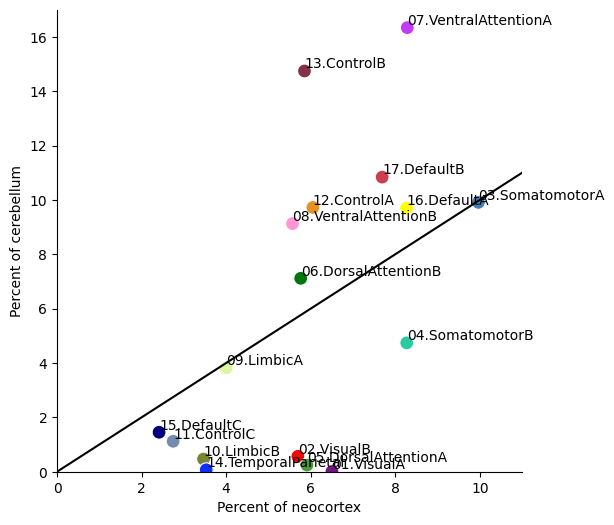

In [ ]:
plot_figure(T,label_colors)
# plt.savefig(fig_dir + '/Yeo17_networksize.pdf', bbox_inches='tight')

## Yeo 17 based on connectivty weights
Go into neocortex and sum up the connectivity weight within each of the Yeo networks 

In [ ]:
D = cs.get_weight_by_cortex('MdWfIbDeHtNiSoScLa','Icosahedron1002','NNLS','A2_group')
D.to_csv('./notebooks/5. Model_description/network_weights_yeo.tsv',sep='\t',index=False)


In [ ]:
D = pd.read_csv('network_weights_yeo.tsv',sep='\t')
label_colors = np.array([D.color_r,D.color_g,D.color_b]).T
plot_figure(D,label_colors)

AttributeError: 'DataFrame' object has no attribute 'cereb_region'

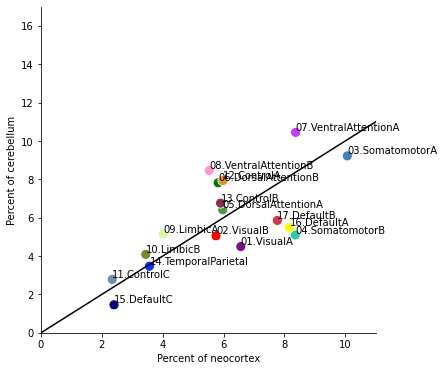

In [19]:
plot_figure(T1,colors1)
plt.savefig(fig_dir + '/Yeo17_inputsize.pdf', bbox_inches='tight')

In [7]:
T2,colors = csw.get_weight_by_cortex(dataset_name='HCP',extension='A-2')

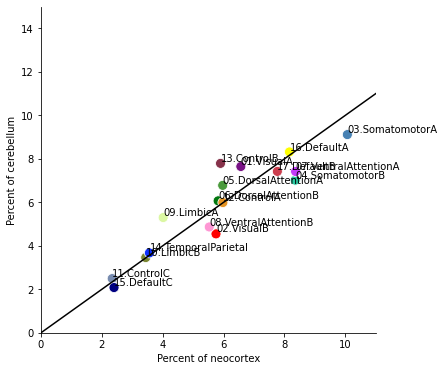

In [8]:
plot_figure(T2,colors)

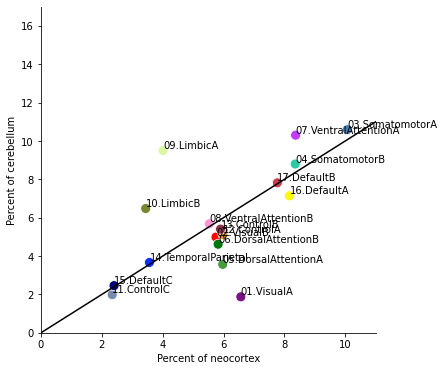

In [20]:
T3,colors = csw.get_weight_by_cortex(dataset_name='MDTB',extension='A6')
plot_figure(T3,colors)

## Nettekoven atlas with Winner-take all assignment of cortical parcels
Use Nettekoven atlas and assign each cortical parcel to one of these parcels based on the highest correlation

In [ ]:
D = cs.calc_relative_input_size('MdWfIbDeHtNiSoScLa')
D.to_csv('./notebooks/5. Model_description/relative_input_size.tsv',sep='\t',index=False)


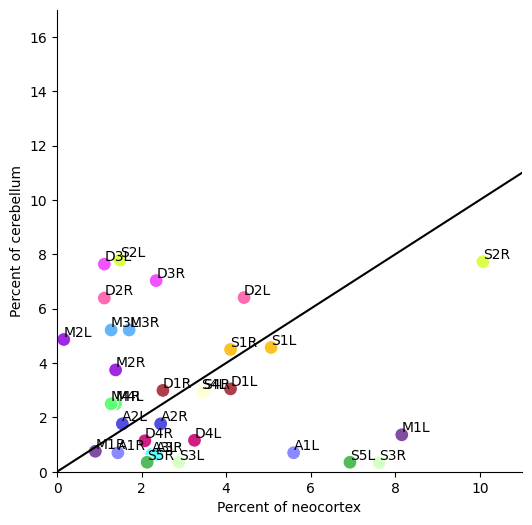

In [14]:
D = pd.read_csv('relative_input_size.tsv',sep='\t')
D['cort_size'] = D['size_cort']/np.sum(D['size_cort'])*100
D['cereb_size'] = D['size_cereb']/np.sum(D['size_cereb'])*100
D['name'] = D.cereb_region
label_colors = np.array([D.color_r,D.color_g,D.color_b]).T
plot_figure(D,label_colors)

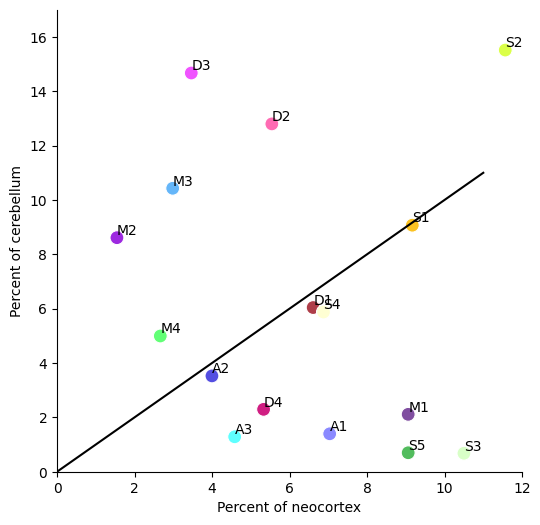

In [30]:
D['name'] = [a[:2] for a in D.cereb_region]
T = D.groupby('name').agg({'cort_size': 'sum', 'cereb_size': 'sum','color_r': 'first', 'color_g': 'first', 'color_b': 'first'})
T = T.reset_index()
label_colors = np.array([T.color_r,T.color_g,T.color_b]).T
plot_figure(T,label_colors)
plt.savefig(fig_dir + '/Nettekoven_networksize.pdf', bbox_inches='tight')